# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$L(w) =  \frac{1}{n}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$
$$L(w) =  \frac{1}{n}\left[\sum_i (y_i - <x_i, w>) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^D w_j^2 $$
$$\frac{\partial L}{\partial w} = \frac{2}{n}\left[\sum_i (y_i - <x_i, w>)(-x_i) \right] + \frac{2}{C} w_{old} $$
$$\frac{\partial L}{\partial w} = \frac{2}{n}\left[\sum_i x_i(<x_i, w> - y_i) \right] + \frac{2}{C} w_{old} $$
$$\frac{\partial L}{\partial w} = \frac{2}{n} X^T(Xw - y) + \frac{2}{C}w_{old} $$
$$ w_{new} = w_{old} -  \frac{2 \alpha}{n}\left[\sum_i x_i(<x_i, w_{old}> - y_i) \right] - \frac{2 \alpha}{C} w_{old} $$
$$ w_{new} = w_{old} -  \frac{2 \alpha}{n}\left[\sum_i x_i(a_i - y_i) \right] - \frac{2 \alpha}{C} w_{old} $$

*Интуитивно можно описать градиент как отклонение предсказания от истиного значения в нужном направлении с некоторым коэффициентом.*

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$
$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log \frac{1}{1 + \exp(-<x_i, w>)} + ( 1 - y_i) \log (1 - \frac{1}{1 + \exp(-<x_i, w>)}) \right] +  \frac{1}{C}\sum_{j=1}^D w_j^2$$
$$L(w) = \frac{1}{n}\left[\sum_i y_i \log {(1 + \exp(-<x_i, w>))} - ( 1 - y_i) \log \frac{\exp(-<x_i, w>)}{1 + \exp(-<x_i, w>)} \right] +  \frac{1}{C}\sum_{j=1}^D w_j^2$$
$$L(w) = \frac{1}{n}\left[\sum_i y_i \log {(1 + \exp(-<x_i, w>))} + y_i\log \exp(-<x_i, w>) - y_i\log {(1 + \exp(-<x_i, w>))} - \log \frac{\exp(-<x_i, w>)}{1 + \exp(-<x_i, w>)} \right] + \frac{1}{C}\sum_{j=1}^D w_j^2 $$
$$L(w) = \frac{1}{n}\left[\sum_i y_i\log \exp(-<x_i, w>) - \log \frac{\exp(-<x_i, w>)}{1 + \exp(-<x_i, w>)} \right] + \frac{1}{C}\sum_{j=1}^D w_j^2 $$
$$L(w) = \frac{1}{n}\left[\sum_i y_i(-<x_i, w>) + \log {(\exp(<x_i, w>) + 1)} \right] + \frac{1}{C}\sum_{j=1}^D w_j^2 $$
$$\frac{\partial L}{\partial w} = \frac{1}{n}\left[\sum_i \frac{x_i}{1 + \exp(-<x_i, w>)} - x_i y_i \right] + \frac{2}{C} w_{old} $$
$$\frac{\partial L}{\partial w} = \frac{1}{n}\left[\sum_i x_i(\sigma(<x_i, w>) - y_i) \right] + \frac{2}{C} w_{old} $$
$$\frac{\partial L}{\partial w} = \frac{1}{n}\left[X^T(\sigma(Xw) - y) \right] + \frac{2}{C} w_{old} $$
$$ w_{new} = w_{old} -  \frac{\alpha}{n}\left[\sum_i x_i(\sigma(<x_i, w>) - y_i) \right] - \frac{2 \alpha}{C} w_{old} $$
$$ w_{new} = w_{old} -  \frac{\alpha}{n}\left[\sum_i x_i(a_i - y_i) \right] - \frac{2 \alpha}{C} w_{old} $$

*Интуитивно можно описать градиент как отклонение вероятностеи правильного класса от истинного значения. Можем заметить что градиент почти идентичен градиенту, возникающему в задаче линейной регрессии.*

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
$$\frac{\partial L}{\partial w} = 2 X^T(Xw - y) $$
$$\frac{\partial^2 L}{\partial w^2} = 2 X^TX $$
*Матрица X полного ранга следоватедовательно матрица $$ X^TX $$ является положительно определенной матрицей Грама.*

 *Точное решение для модели с  𝐿2  регуляризацией:*
 $$\frac{\partial L}{\partial w} = \frac{2}{n}\left[\sum_i x_i(<x_i, w> - y_i) \right] + \frac{2}{C} w_{old} = 0$$
 $$\frac{\partial L}{\partial w} = \frac{2}{n} X^T(Xw - y) + \frac{2}{C}w = 0$$
 $$ \frac{2}{n} X^TXw + \frac{2}{C}w - \frac{2}{n}X^Ty = 0 $$
 $$ (\frac{2}{n} X^TX + \frac{2}{C}I)w = \frac{2}{n}X^Ty $$
 $$ w = (X^TX + \frac{n}{C}I)^{-1}X^Ty $$
 *Регуляризация предототвращает паралич, повышает устойчивость весов в случае мультиколлинеарности,
способствует повышению обобщающей способности алгоритма и снижению риска переобучения. Благодаря регуляризации у нас уменьшается значимость линейно зависимых признаков*

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
$$ \frac{\partial E(L | x_i)}{\partial a(x_i)} = \frac{ -p(y_i = 1 |x_i )}{ a(x_i)} + \frac{ p(y_i = 0 | x_i)}{ (1 - a(x_i))} = 0 $$
$$ \frac{ -p(y_i = 1 |x_i )}{ a(x_i)} + \frac{ 1 - p(y_i = 1 | x_i)}{ (1 - a(x_i))} = 0 $$
$$ \frac{ p(y_i = 1 |x_i )}{ a(x_i)} = \frac{ 1 - p(y_i = 1 | x_i)}{ (1 - a(x_i))} $$
$$ p(y_i = 1 |x_i )(1 - a(x_i)) = a(x_i)(1 - p(y_i = 1 | x_i)) $$
$$ a(x_i) = p(y_i = 1 |x_i )$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
*w_0 вводится для настройки смещения модели, а регуляризацию мы используем для настройки весов модели. Таким образом w_0 нет смысла штрафовать, так как он лишь сдвигает модель*

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    indx = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(indx)
        
    for i in np.array_split(indx, np.arange(batch_size, X.shape[0], batch_size)):
        X_batch = X[i]
        y_batch = y[i]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [26]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', shuffle=True, batch_size=1, threshold = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.threshold = threshold
        

        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            pred = np.dot(X_batch, self.weights)
            reg = 1 / self.C * (self.weights[1:]**2).sum()
            loss = 1 / y_batch.shape[0] * ((y_batch - pred)**2).sum() + reg
            
        elif self.model_type == 'log_reg':
            pred = sigmoid(np.dot(X_batch, self.weights))
            reg = 1 / self.C * (self.weights[1:]**2).sum()
            loss = - 1 / y_batch.shape[0] * (y_batch * np.log(pred) + (1 - y_batch) * np.log(1 - pred)).sum() + reg
        
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            pred = np.dot(X_batch, self.weights)
            reg = 2 / self.C * self.weights[1:]
            reg = np.hstack((0, reg))
            loss_grad = 2 / y_batch.shape[0] * np.dot(X_batch.T, (pred - y_batch)) + reg
        
        elif self.model_type == 'log_reg':
            pred = sigmoid(np.dot(X_batch, self.weights))
            reg = 2 / self.C * self.weights[1:]
            reg = np.hstack((0, reg))
            loss_grad = 1 / y_batch.shape[0] * np.dot(X_batch.T, (pred - y_batch)) + reg
        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        #Приставим к Х слева столбец единиц для того, чтобы инициализировать w0
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализировать случайно веса
        self.weights = np.random.uniform(-1, 1, X.shape[1])
        
        # Нужно инициализровать случайно веса
        #self.weights = np.ones(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.shuffle, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = np.dot(X, self.weights)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        if(self.model_type == 'lin_reg'):
            y_hat[np.where(y_hat>=0)] = 1
            y_hat[np.where(y_hat<0)] = 0
        if(self.model_type == 'log_reg'):
            y_hat - sigmoid(y_hat)
            y_hat[np.where(y_hat>=self.threshold)] = 1
            y_hat[np.where(y_hat<self.threshold)] = 0
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [17]:
def plot_decision_boundary(clf, label):
    x = np.linspace(-6, 10, 2)
    plt.plot(x, -(clf.weights[1] * x + clf.weights[0]) / clf.weights[2], label='разделяющая поверхность ' + label)

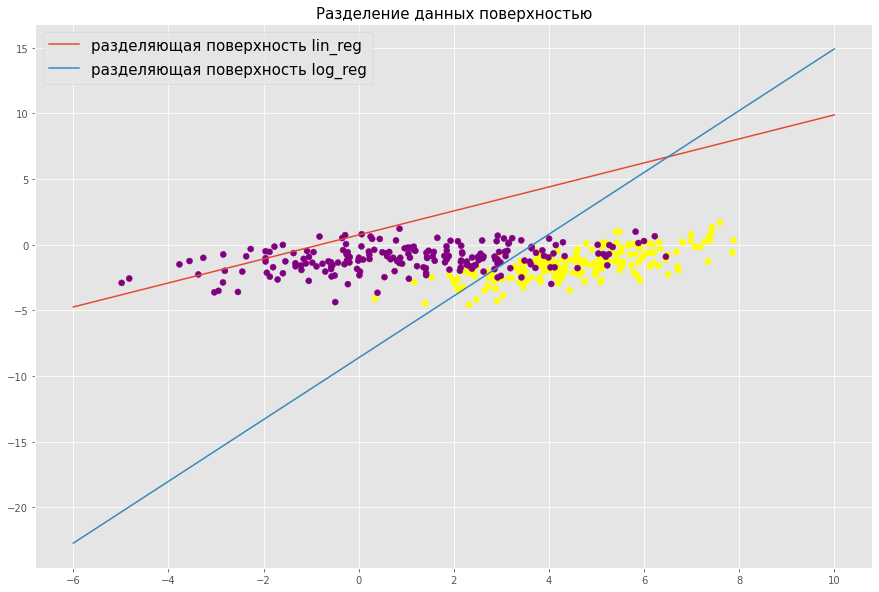

In [18]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

fig = plt.figure(figsize = (15, 10))
plt.title('Разделение данных поверхностью', fontsize=15)
my_model_lin = MySGDClassifier(batch_generator, model_type='lin_reg')
my_model_log = MySGDClassifier(batch_generator, model_type='log_reg')
my_model_lin.fit(X, y)
my_model_log.fit(X, y)
plot_decision_boundary(my_model_lin, 'lin_reg')
plot_decision_boundary(my_model_log, 'log_reg')
plt.legend(fontsize = 15)
plt.grid(True)

d = {0:'purple', 1:'yellow'}
plt.scatter(X[:,0], X[:,1], c=[d[i] for i in y])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [21]:
from sklearn.datasets import make_classification

In [22]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

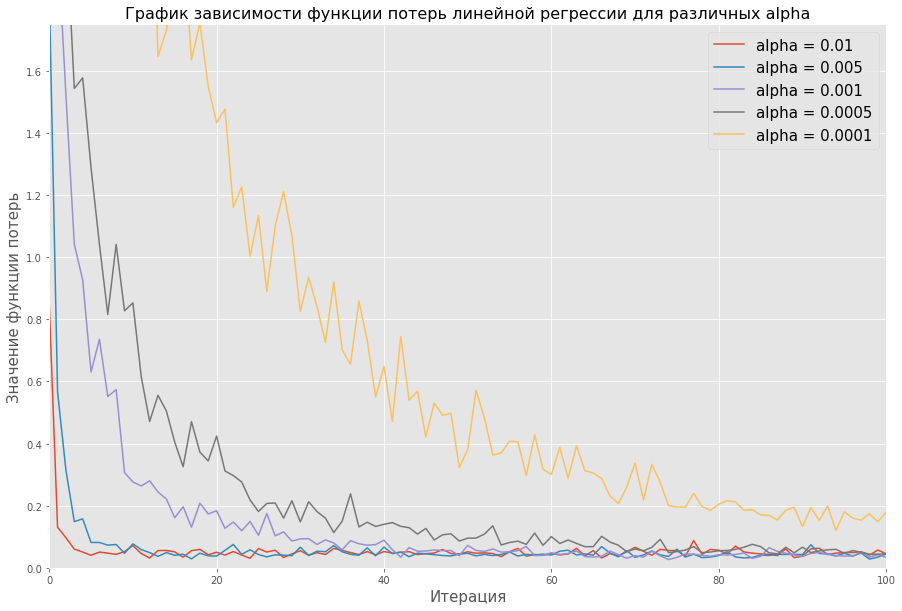

In [11]:
np.random.seed(0)
fig = plt.figure(figsize = (15, 10))
plt.title('График зависимости функции потерь линейной регрессии для различных alpha',fontsize=16)
plt.xlabel('Итерация', fontsize=15)
plt.ylabel('Значение функции потерь', fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 1.75)
for alpha in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
    my_model_lin = MySGDClassifier(batch_generator, C=100, alpha=alpha, model_type='lin_reg')
    my_model_lin.fit(X, y)
    _y = list(map(lambda i: np.mean(my_model_lin.errors_log['loss'][i * 100 : (i + 1) * 100]), range(len(my_model_lin.errors_log['loss']) // 100)))
    _x = np.arange(len(_y))
    plt.plot(_x, _y, label='alpha = {}'.format(alpha))
plt.legend(fontsize = 15)
plt.grid(True)

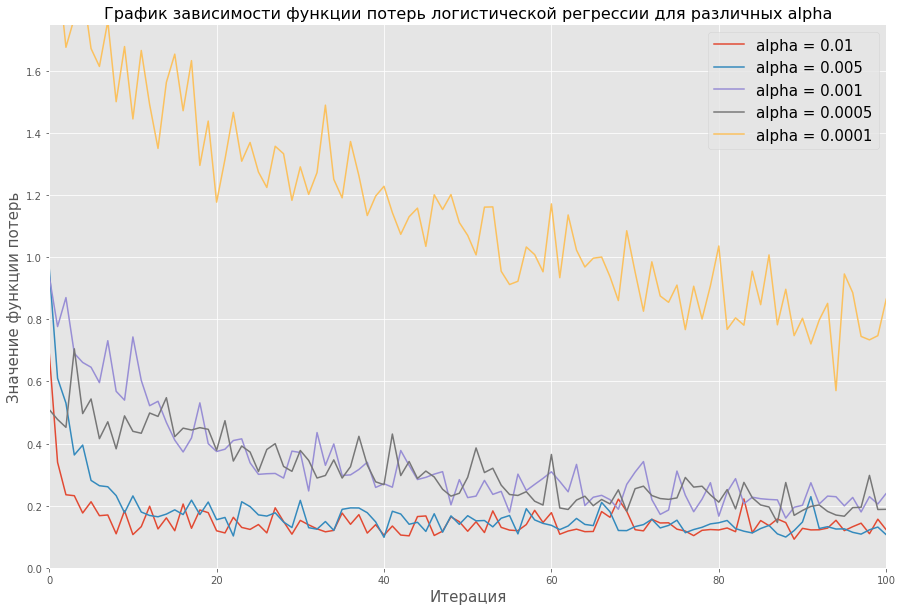

In [12]:
fig = plt.figure(figsize = (15, 10))
plt.title('График зависимости функции потерь логистической регрессии для различных alpha',fontsize=16)
plt.xlabel('Итерация', fontsize=15)
plt.ylabel('Значение функции потерь', fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 1.75)
for alpha in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
    my_model_log = MySGDClassifier(batch_generator, C=100, alpha=alpha, model_type='log_reg')
    my_model_log.fit(X, y)
    _y = list(map(lambda i: np.mean(my_model_log.errors_log['loss'][i * 100 : (i + 1) * 100]), range(len(my_model_log.errors_log['loss']) // 100)))
    _x = np.arange(len(_y))
    plt.plot(_x, _y, label='alpha = {}'.format(alpha))
plt.legend(fontsize = 15)
plt.grid(True)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

*Для альфа 0.01, 0.005 достаточно быстро алгоритм зацикливается, так что найилучшим для линейноой регрессии будет 0.0005 или даже 0.0001, тоже можно сказать и про логистическую регрессию*

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

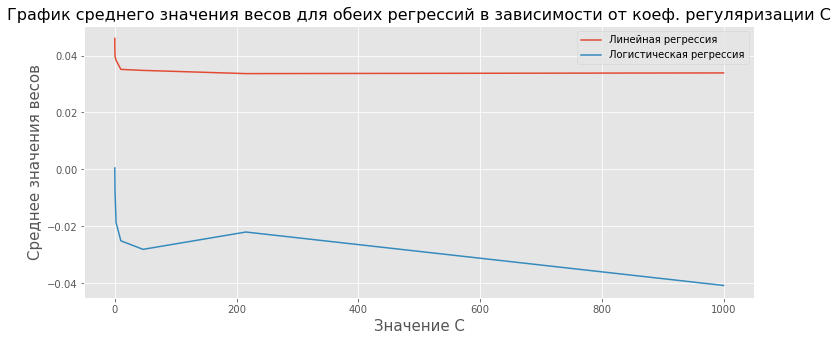

In [27]:
lin_w = []
log_w = []
for c in np.logspace(3, -3, 10):
    my_model_lin = MySGDClassifier(batch_generator, C=c, alpha=0.0001, max_epoch=5, model_type='lin_reg')
    my_model_log = MySGDClassifier(batch_generator, C=c, alpha=0.0001, max_epoch=5, model_type='log_reg')
    my_model_log.fit(X, y)
    my_model_lin.fit(X, y)
    lin_w.append(np.mean(my_model_lin.weights))
    log_w.append(np.mean(my_model_log.weights))

plt.title('График среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С',fontsize=16)
plt.xlabel('Значение С', fontsize=15)
plt.ylabel('Среднее значения весов', fontsize=15)
plt.plot(np.logspace(3, -3, 10), lin_w, label='Линейная регрессия')
plt.plot(np.logspace(3, -3, 10), log_w, label='Логистическая регрессия')
plt.legend()
plt.grid(True)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

*И да и нет)))*

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [147]:
doc_to_title = {}
with open('docs_titles.tsv', encoding="utf-8") as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [148]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [149]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [150]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [151]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [152]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [153]:
scale_features_std = StandardScaler()
X_train = scale_features_std.fit_transform(X_train)
X_test = scale_features_std.fit_transform(X_test)

In [ ]:
import time

In [177]:
batches = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
lin = []
time_lin = []
log = []
time_log = []
for batch in batches:
    start_time = time.time()
    np.random.seed(5)
    my_model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=batch)
    my_model_lin.fit(X_train[:7000], y_train[:7000])
    pred_lin = my_model_lin.predict(X_train[7000:])
    lin.append(f1_score(y_train[7000:], pred_lin))
    time_lin.append(time.time() - start_time)
    
    start_time = time.time()
    np.random.seed(4)
    my_model_log = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=batch)
    my_model_log.fit(X_train[:7000], y_train[:7000])
    pred_log = my_model_log.predict(X_train[7000:])
    log.append(f1_score(y_train[7000:], pred_log))
    time_log.append(time.time() - start_time)

lin_batch = batches[np.argmax(lin)]
lin_maxtime = time_lin[np.argmax(lin)]
print("Для линейной регрессии количество батчей", lin_batch, "время", lin_maxtime)

log_batch = batches[np.argmax(log)]
log_maxtime = time_log[np.argmax(log)]
print("Для логистической регрессии количество батчей", log_batch, "время", log_maxtime)

Для линейной регрессии количество батчей 1000 время 0.009926557540893555
Для логистической регрессии количество батчей 500 время 0.019890308380126953


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [92]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True)

In [179]:
C = [0.1, 0.2, 0.5, 1, 2, 5, 10, 50, 100, 200, 500, 1000]
lin = []
log = []
for c in C:
    my_model_lin = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=1000, C=c)
    my_model_log = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=500, C=c)
    res_lin = 0
    res_log = 0
    for ind_train, ind_test in kfold.split(X_train, y_train):
        X_train_, X_test_, y_train_, y_test_ = X_train[ind_train], X_train[ind_test], y_train[ind_train], y_train[ind_test]
        np.random.seed(5)
        my_model_lin.fit(X_train_, y_train_)
        pred_lin = my_model_lin.predict(X_test_)
        
        np.random.seed(4)
        my_model_log.fit(X_train_, y_train_)
        pred_log = my_model_log.predict(X_test_)
        
        res_lin += f1_score(y_test_, pred_lin)
        res_log += f1_score(y_test_, pred_log)
        
    lin.append(res_lin / 5)
    log.append(res_log / 5)

lin_c = C[np.argmax(lin)]   
log_c = C[np.argmax(log)]   

print("Для линейной регрессии C =", lin_c)
print("Для логистической регрессии C =", log_c)

Для линейной регрессии C = 5
Для логистической регрессии C = 5


In [182]:
Alpha = [0.01, 0.005, 0.001, 0.0005, 0.0001]
lin = []
log = []
for alpha in Alpha:
    my_model_lin = MySGDClassifier(batch_generator, alpha = alpha, model_type='lin_reg', batch_size=1000, C=5)
    my_model_log = MySGDClassifier(batch_generator, alpha = alpha, model_type='log_reg', batch_size=500, C=5)
    res_lin = 0
    res_log = 0
    for ind_train, ind_test in kfold.split(X_train, y_train):
        X_train_, X_test_, y_train_, y_test_ = X_train[ind_train], X_train[ind_test], y_train[ind_train], y_train[ind_test]
        np.random.seed(5)
        my_model_lin.fit(X_train_, y_train_)
        pred_lin = my_model_lin.predict(X_test_)
        
        np.random.seed(4)
        my_model_log.fit(X_train_, y_train_)
        pred_log = my_model_log.predict(X_test_)
        
        res_lin += f1_score(y_test_, pred_lin)
        res_log += f1_score(y_test_, pred_log)
        
    lin.append(res_lin / 5)
    log.append(res_log / 5)

lin_alpha = Alpha[np.argmax(lin)]   
log_alpha = Alpha[np.argmax(log)]   

print("Для линейной регрессии alpha =", lin_alpha)
print("Для логистической регрессии alpha =", log_alpha)

Для линейной регрессии alpha = 0.01
Для логистической регрессии alpha = 0.01


In [187]:
max_epoch = [2, 5, 8, 10, 15, 25, 30, 40, 50]
lin = []
log = []
for epoch in max_epoch:
    my_model_lin = MySGDClassifier(batch_generator, max_epoch = epoch, alpha = 0.01, model_type='lin_reg', batch_size=1000, C=5)
    my_model_log = MySGDClassifier(batch_generator, max_epoch = epoch, alpha = 0.01, model_type='log_reg', batch_size=500, C=5)
    res_lin = 0
    res_log = 0
    for ind_train, ind_test in kfold.split(X_train, y_train):
        X_train_, X_test_, y_train_, y_test_ = X_train[ind_train], X_train[ind_test], y_train[ind_train], y_train[ind_test]
        np.random.seed(5)
        my_model_lin.fit(X_train_, y_train_)
        pred_lin = my_model_lin.predict(X_test_)
        
        np.random.seed(4)
        my_model_log.fit(X_train_, y_train_)
        pred_log = my_model_log.predict(X_test_)
        
        res_lin += f1_score(y_test_, pred_lin)
        res_log += f1_score(y_test_, pred_log)
        
    lin.append(res_lin / 5)
    log.append(res_log / 5)

lin_epoch = max_epoch[np.argmax(lin)]   
log_epoch = max_epoch[np.argmax(log)]   

print("Для линейной регрессии max_epoch =", lin_epoch)
print("Для логистической регрессии max_epoch =", log_epoch)
print(log)

Для линейной регрессии max_epoch = 8
Для логистической регрессии max_epoch = 8
[0.6045500944540698, 0.6183673357934149, 0.6219838728421487, 0.6190870606962535, 0.5962665681311954, 0.5451229769844653, 0.5197182920691196, 0.46620312317933177, 0.4412378101387211]


In [188]:
best_model = ['lin_reg', 'log_reg']
mod = []
for model in best_model:
    if model == 'lin_reg':
        my_model = MySGDClassifier(batch_generator, max_epoch = 8, alpha = 0.01, model_type='lin_reg', batch_size=1000, C=5)
    else:
        my_model = MySGDClassifier(batch_generator, max_epoch = 8, alpha = 0.01, model_type='log_reg', batch_size=500, C=5)
    res = 0
    for ind_train, ind_test in kfold.split(X_train, y_train):
        if model == 'lin_reg':
            np.random.seed(5)
        else:
            np.random.seed(4)
            
        X_train_, X_test_, y_train_, y_test_ = X_train[ind_train], X_train[ind_test], y_train[ind_train], y_train[ind_test]
        my_model.fit(X_train_, y_train_)
        pred = my_model.predict(X_test_)
        
        res += f1_score(y_test_, pred)
        
    mod.append(res / 5)

model = best_model[np.argmax(mod)]
print(mod)

print("Лучшая модель =", model)

[0.5220412457544921, 0.6221503843506113]
Лучшая модель = log_reg


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [189]:
threshold = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
mod = []
for th in threshold:
    my_model = MySGDClassifier(batch_generator, max_epoch = 8, alpha = 0.01, model_type='log_reg', batch_size=500, C=5, threshold = th)
    res = 0
    for ind_train, ind_test in kfold.split(X_train, y_train):
        X_train_, X_test_, y_train_, y_test_ = X_train[ind_train], X_train[ind_test], y_train[ind_train], y_train[ind_test]
        np.random.seed(4)
        my_model.fit(X_train_, y_train_)
        pred = my_model.predict(X_test_)
        
        res += f1_score(y_test_, pred)
        
    mod.append(res / 5)

best_th = threshold[np.argmax(mod)]
print(mod)

print("Лучший порог =", best_th)

[0.6172715433040117, 0.6174483766437333, 0.6238676540839573, 0.6219055376763084, 0.6222290998629969, 0.6214751132168359, 0.6199846229057844, 0.6143412348545414, 0.612715996343717]
Лучший порог = 0.4


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [190]:
my_model = MySGDClassifier(batch_generator, max_epoch = 8, alpha = 0.01, model_type='log_reg', batch_size=500, C=5, threshold = 0.4)
np.random.seed(4)
my_model.fit(X_train, y_train)
pred = my_model.predict(X_test)

In [202]:
pred = pred.astype('int')

In [203]:
file = open("try_1.csv", "w")
file.write("pair_id,target\n")
pair_ids = test_data['pair_id']
for k, pair_id in enumerate(pair_ids):
    file.write(str(pair_id) + "," +str(pred[k]) + str("\n"))
file.close()

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

Максимально странный ник *m100128*, который получился случайно и теперь не меняется)))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

*Момент где мы рисуем график с разными C остался не очень понятен, возможно я сделала что-то не так*

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

*Это была очень интересная работа, которая значительно улучшила мое понимание линейной и логистической регрессии)*